In [187]:
#Análisis de Datos de Fallecimientos en siniestros de tránsito Uruguay 2013-2019


# El objetivo principal de este proyecto es detectar las principales causas de fallecimientos por siniestros de transito.
# Ver la relación que tienen las horas pico, las zonas más afectadas, el tipo de vehículo, tipo de siniestro, etc.
# Incluso veremos si la Edad es un factor clave a la hora de sobrevivir o fallecer en un siniestro.



#Cargamos Librerías

import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np

In [188]:
#Cargamos DataSet

df = pd.read_csv(r"c:\Users\Christian\Documents\datos-fallecidos-en-siniestros-de-trnsito-2013-2019.csv", encoding="latin1", delimiter=";")
df

,Fecha y hora,Departamento,Localidad,Jurisdiccion,Tipo de Siniestro,Vehiculo,Rol,Edad,Sexo,Fallecido a los Dias,Otro vehiculo,Lugar del Siniestro,X,Y
0,01/01/2013 23:15,CANELONES,N/C,NACIONAL,COLISIÓN CON OBSTÁCULO EN CALZADA,MOTO,CONDUCTOR,34.0,F,0,NaN,RUTA 101 km 24,"589815,34","6143862,76"
1,01/01/2013 23:35,SALTO,SALTO,DEPARTAMENTAL,ATROPELLO DE PEATÓN,PEATÓN,PEATÓN,52.0,F,0,MOTO,MAGALLANES próx. Barrio Chinchurreta,"411579,77","6526872,77"
2,03/01/2013 23:35,PAYSANDU,N/C,NACIONAL,COLISIÓN ENTRE VEHÍCULOS,AUTO,CONDUCTOR,34.0,M,8,CAMION,RUTA 3 km. 358,"412321,54","6407067,58"
3,04/01/2013 7:10,COLONIA,N/C,NACIONAL,DESPISTE,AUTO,CONDUCTOR,49.0,F,1,NaN,RUTA 21 esq. Dr Irastorza,"379424,37","6240356,26"
4,04/01/2013 11:00,CANELONES,PROGRESO,DEPARTAMENTAL,DESPISTE,AUTO,CONDUCTOR,91.0,M,0,NaN,CESAR MAYO GUTIERREZ senda CAMINO PELUFFO,"570675,1","6164479,53"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,29/12/2019 20:24,PAYSANDU,N/C,NACIONAL,COLISIÓN ENTRE VEHÍCULOS,AUTO,PASAJERO,23.0,F,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3473,29/12/2019 20:24,PAYSANDU,N/C,NACIONAL,COLISIÓN ENTRE VEHÍCULOS,AUTO,PASAJERO,5.0,M,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3474,29/12/2019 20:24,PAYSANDU,N/C,NACIONAL,COLISIÓN ENTRE VEHÍCULOS,AUTO,CONDUCTOR,23.0,M,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3475,29/12/2019 20:24,PAYSANDU,N/C,NACIONAL,COLISIÓN ENTRE VEHÍCULOS,CAMIONETA,PASAJERO,60.0,F,27,AUTO,"RUTA 24 KM 88,000","405112,07","6404241,81"


In [189]:
#Verifico atributos e instancias
df.shape

(3477, 14)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha y hora          3477 non-null   object 
 1   Departamento          3477 non-null   object 
 2   Localidad             3477 non-null   object 
 3   Jurisdiccion          3477 non-null   object 
 4   Tipo de Siniestro     3477 non-null   object 
 5   Vehiculo              3477 non-null   object 
 6   Rol                   3477 non-null   object 
 7   Edad                  3433 non-null   float64
 8   Sexo                  3476 non-null   object 
 9   Fallecido a los Dias  3477 non-null   int64  
 10  Otro vehiculo         2405 non-null   object 
 11  Lugar del Siniestro   3477 non-null   object 
 12  X                     3476 non-null   object 
 13  Y                     3476 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 380.4+ KB


In [191]:
#Verifico datos Nulos
nulos = df.isnull().sum()

# Mostrar el resultado
print(nulos)

Fecha y hora               0
Departamento               0
Localidad                  0
Jurisdiccion               0
Tipo de Siniestro          0
Vehiculo                   0
Rol                        0
Edad                      44
Sexo                       1
Fallecido a los Dias       0
Otro vehiculo           1072
Lugar del Siniestro        0
X                          1
Y                          1
dtype: int64


In [192]:
#Relleno los valores Nulos de 'Edad' con el Promedio de Edad

df['Edad'] = df['Edad'].fillna(df['Edad'].mean())  # Promedio

#Verifico datos Nulos
nulos = df.isnull().sum()

# Mostrar el resultado
print(nulos)

Fecha y hora               0
Departamento               0
Localidad                  0
Jurisdiccion               0
Tipo de Siniestro          0
Vehiculo                   0
Rol                        0
Edad                       0
Sexo                       1
Fallecido a los Dias       0
Otro vehiculo           1072
Lugar del Siniestro        0
X                          1
Y                          1
dtype: int64


In [193]:
#Como los valores nulos de 'Otro Vehiculo' se deben a que no hay 'otro vehiculo' o es desconocido, los suplanto con un valor fijo.

df['Otro vehiculo'] = df['Otro vehiculo'].fillna('Sin Dato')

#Verifico datos Nulos
nulos = df.isnull().sum()

# Mostrar el resultado
print(nulos)

Fecha y hora            0
Departamento            0
Localidad               0
Jurisdiccion            0
Tipo de Siniestro       0
Vehiculo                0
Rol                     0
Edad                    0
Sexo                    1
Fallecido a los Dias    0
Otro vehiculo           0
Lugar del Siniestro     0
X                       1
Y                       1
dtype: int64


In [194]:
# Dado que ahora los valores nulos son muy escasos, los elimino.

df = df.dropna(subset=['Sexo'])
df = df.dropna(subset=['X'])
df = df.dropna(subset=['Y'])

#Verifico datos Nulos
nulos = df.isnull().sum()

# Mostrar el resultado
print(nulos)

Fecha y hora            0
Departamento            0
Localidad               0
Jurisdiccion            0
Tipo de Siniestro       0
Vehiculo                0
Rol                     0
Edad                    0
Sexo                    0
Fallecido a los Dias    0
Otro vehiculo           0
Lugar del Siniestro     0
X                       0
Y                       0
dtype: int64


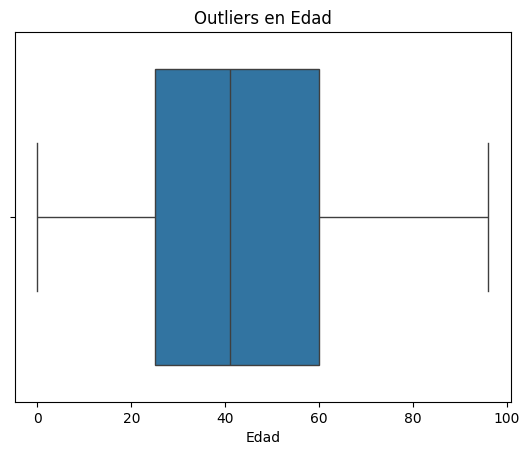

In [195]:
# Crear el boxplot con posibles outliers de Edad
sns.boxplot(x=df['Edad'])
plt.title("Outliers en Edad")
plt.show()

C:\Users\Christian\AppData\Local\Temp\ipykernel_13304\1311342549.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


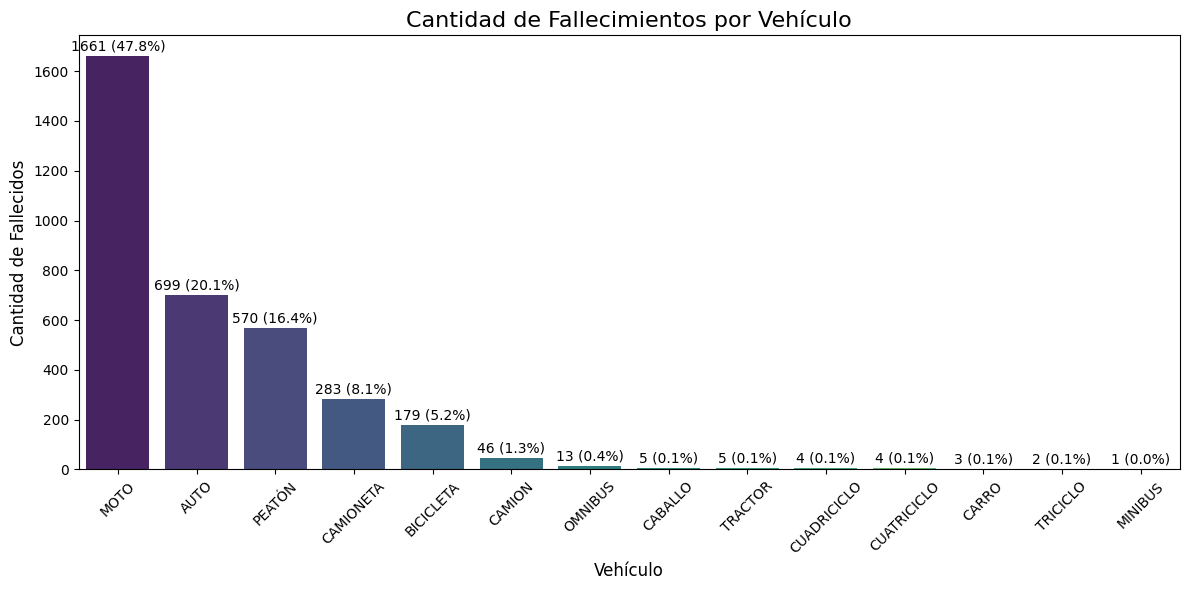

In [196]:
# 1. Agrupar los datos por Vehículo y contar fallecimientos
fallecimientos_por_vehiculo = df.groupby('Vehiculo').size().reset_index(name='Cantidad de Fallecidos')

# 2. Ordenar por la cantidad de fallecimientos de mayor a menor
fallecimientos_por_vehiculo = fallecimientos_por_vehiculo.sort_values(by='Cantidad de Fallecidos', ascending=False)

# 3. Calcular el total de fallecimientos para porcentajes
total_fallecimientos = fallecimientos_por_vehiculo['Cantidad de Fallecidos'].sum()

# 4. Crear el gráfico de barras con hue=None
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Vehiculo', 
    y='Cantidad de Fallecidos', 
    data=fallecimientos_por_vehiculo, 
    palette='viridis', 
    hue=None,  # Especificar que no se utiliza hue
    legend=False  # Desactivar la leyenda
)

# 5. Agregar números y porcentajes sobre las barras
for bar, label in zip(ax.patches, fallecimientos_por_vehiculo['Cantidad de Fallecidos']):
    porcentaje = (label / total_fallecimientos) * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Posición X
        bar.get_height() + 10,             # Posición Y
        f"{int(label)} ({porcentaje:.1f}%)",  # Mostrar cantidad y porcentaje
        ha='center', va='bottom', fontsize=10
    )

# Personalizar el gráfico
plt.title('Cantidad de Fallecimientos por Vehículo', fontsize=16)
plt.xlabel('Vehículo', fontsize=12)
plt.ylabel('Cantidad de Fallecidos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\Christian\AppData\Local\Temp\ipykernel_13304\2351311175.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


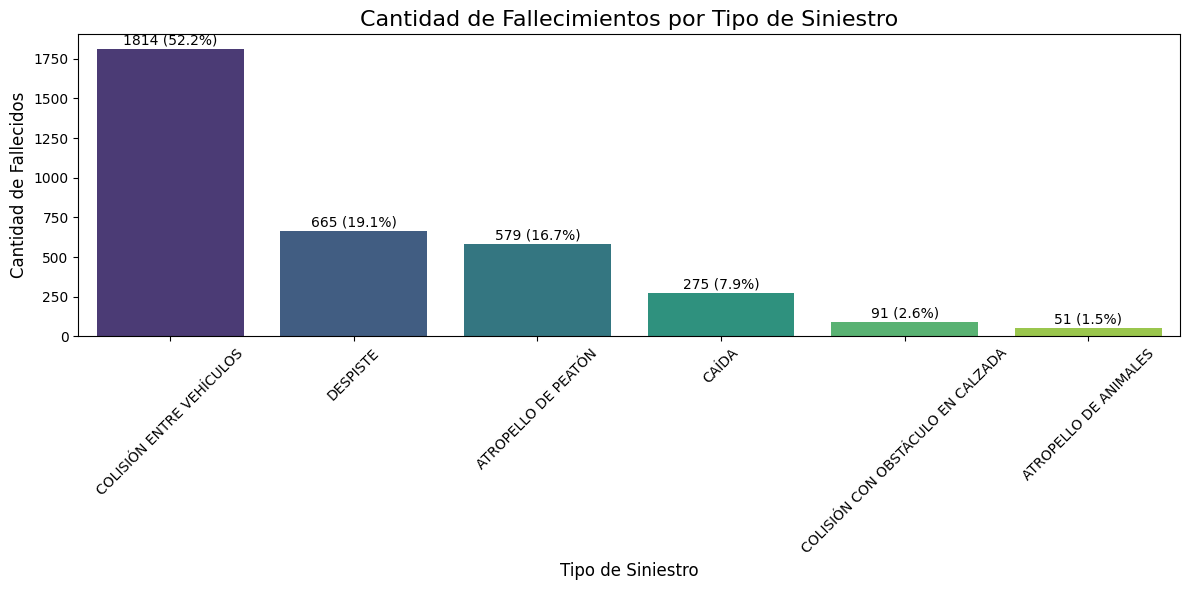

In [197]:
# 1. Agrupar los datos por Tipo de Siniestro y contar fallecimientos
fallecimientos_por_siniestro = df.groupby('Tipo de Siniestro').size().reset_index(name='Cantidad de Fallecidos')

# 2. Ordenar por la cantidad de fallecimientos de mayor a menor
fallecimientos_por_siniestro = fallecimientos_por_siniestro.sort_values(by='Cantidad de Fallecidos', ascending=False)

# 3. Calcular el total de fallecimientos para porcentajes
total_fallecimientos = fallecimientos_por_siniestro['Cantidad de Fallecidos'].sum()

# 4. Crear el gráfico de barras con hue=None
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Tipo de Siniestro', 
    y='Cantidad de Fallecidos', 
    data=fallecimientos_por_siniestro, 
    palette='viridis', 
    hue=None,  # Especificar que no se utiliza hue
    legend=False  # Desactivar la leyenda
)

# 5. Agregar números y porcentajes sobre las barras
for bar, label in zip(ax.patches, fallecimientos_por_siniestro['Cantidad de Fallecidos']):
    porcentaje = (label / total_fallecimientos) * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Posición X
        bar.get_height() + 10,             # Posición Y
        f"{int(label)} ({porcentaje:.1f}%)",  # Mostrar cantidad y porcentaje
        ha='center', va='bottom', fontsize=10
    )

# Personalizar el gráfico
plt.title('Cantidad de Fallecimientos por Tipo de Siniestro', fontsize=16)
plt.xlabel('Tipo de Siniestro', fontsize=12)
plt.ylabel('Cantidad de Fallecidos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\Christian\AppData\Local\Temp\ipykernel_13304\1980429038.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


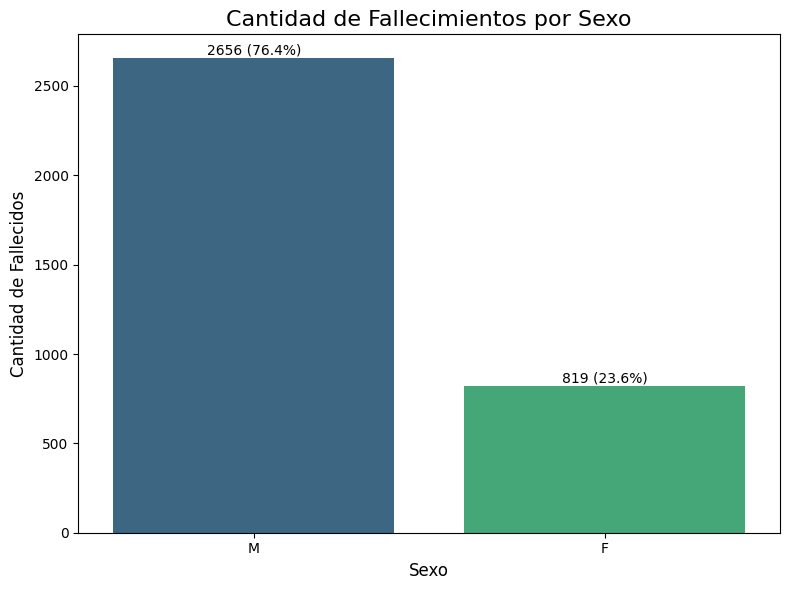

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupar los datos por Sexo y contar fallecimientos
fallecimientos_por_sexo = df.groupby('Sexo').size().reset_index(name='Cantidad de Fallecidos')

# 2. Ordenar por la cantidad de fallecimientos (si lo necesitás, aunque en este caso no es obligatorio)
fallecimientos_por_sexo = fallecimientos_por_sexo.sort_values(by='Cantidad de Fallecidos', ascending=False)

# 3. Calcular el total de fallecimientos para porcentajes
total_fallecimientos = fallecimientos_por_sexo['Cantidad de Fallecidos'].sum()

# 4. Crear el gráfico de barras con hue=None
plt.figure(figsize=(8, 6))  # Ajustar tamaño para datos simples
ax = sns.barplot(
    x='Sexo', 
    y='Cantidad de Fallecidos', 
    data=fallecimientos_por_sexo, 
    palette='viridis', 
    hue=None,  # Especificar que no se utiliza hue
    legend=False  # Desactivar la leyenda
)

# 5. Agregar números y porcentajes sobre las barras
for bar, label in zip(ax.patches, fallecimientos_por_sexo['Cantidad de Fallecidos']):
    porcentaje = (label / total_fallecimientos) * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Posición X
        bar.get_height() + 5,              # Posición Y
        f"{int(label)} ({porcentaje:.1f}%)",  # Mostrar cantidad y porcentaje
        ha='center', va='bottom', fontsize=10
    )

# Personalizar el gráfico
plt.title('Cantidad de Fallecimientos por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Cantidad de Fallecidos', fontsize=12)
plt.xticks(rotation=0, fontsize=10)  # No hace falta rotar si son pocas categorías
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [199]:
# Calcular la edad promedio de fallecidos por vehículo
edad_promedio_por_vehiculo = (
    df[df['Edad'].notnull()]  # Filtrar valores nulos en la columna Edad
    .groupby('Vehiculo')['Edad']
    .mean()
    .reset_index()
    .sort_values(by='Edad', ascending=False)  # Ordenar de mayor a menor edad promedio
)

# Redondear las edades promedio a números enteros
edad_promedio_por_vehiculo['Edad'] = edad_promedio_por_vehiculo['Edad'].round().astype(int)

# Renombrar las columnas para mayor claridad
edad_promedio_por_vehiculo.columns = ['Vehiculo', 'Edad Promedio']

# Mostrar el resultado
print(edad_promedio_por_vehiculo)



       Vehiculo  Edad Promedio
8       MINIBUS             93
6   CUADRICICLO             78
7   CUATRICICLO             60
11       PEATÓN             57
5         CARRO             56
13     TRICICLO             56
2       CABALLO             55
1     BICICLETA             50
0          AUTO             45
4     CAMIONETA             45
3        CAMION             44
10      OMNIBUS             38
9          MOTO             37
12      TRACTOR             17


In [200]:
df['Fecha y hora'] = pd.to_datetime(df['Fecha y hora'], format='%d/%m/%Y %H:%M', errors='coerce')
df['Hora'] = df['Fecha y hora'].dt.hour


In [173]:
#Convertimos las fechas al formato datetime usando el parámetro format para especificar su estructura
df['Fecha y hora'] = pd.to_datetime(df['Fecha y hora'], format='%d/%m/%Y %H:%M', errors='coerce')

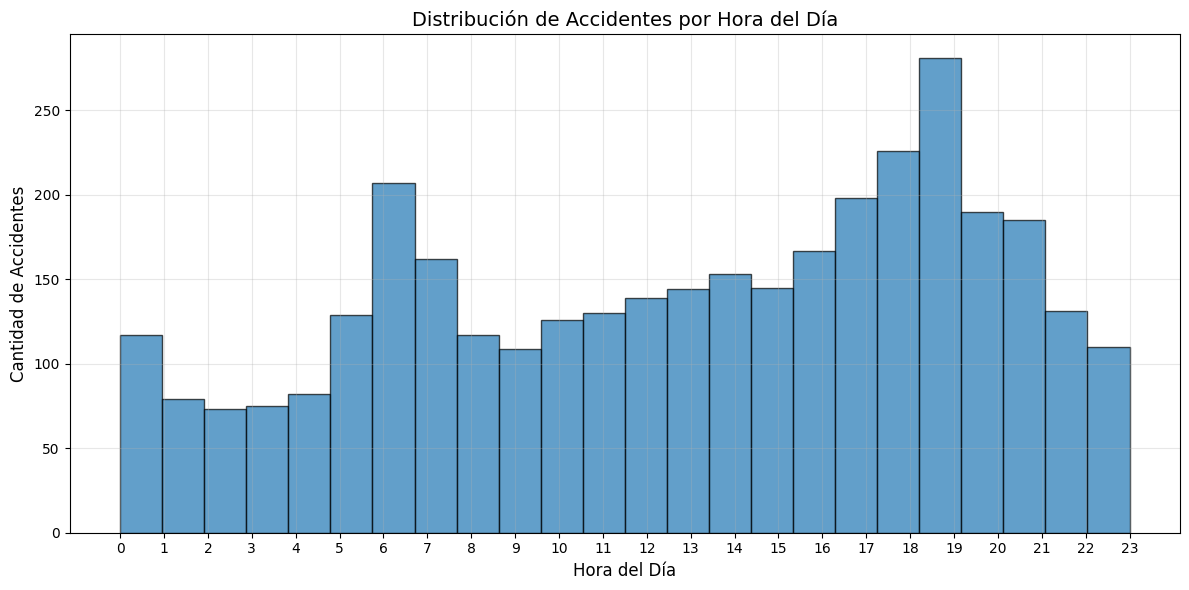

In [201]:
#Creamos Grafico

plt.figure(figsize=(12, 6))
plt.hist(df['Hora'], bins=24, edgecolor='k', alpha=0.7)
plt.title('Distribución de Accidentes por Hora del Día', fontsize=14)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Cantidad de Accidentes', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Con el grafico anterior, podemos decir que la mayor cantidad de accidentes también se da en las horas pico, siendo estas entre las 5:00 y 7:00, que es cuando usualmente la gente va a trabajar
# y luego entre las 16:00 y las 19:00, que es cuando salen de trabajar

In [202]:
print(df.head(10))


         Fecha y hora Departamento   Localidad  Jurisdiccion   \
0 2013-01-01 23:15:00    CANELONES         N/C       NACIONAL   
1 2013-01-01 23:35:00        SALTO       SALTO  DEPARTAMENTAL   
2 2013-01-03 23:35:00     PAYSANDU         N/C       NACIONAL   
3 2013-01-04 07:10:00      COLONIA         N/C       NACIONAL   
4 2013-01-04 11:00:00    CANELONES    PROGRESO  DEPARTAMENTAL   
5 2013-01-05 00:20:00       RIVERA         N/C  DEPARTAMENTAL   
6 2013-01-06 14:10:00   MONTEVIDEO  MONTEVIDEO  DEPARTAMENTAL   
7 2013-01-06 15:30:00       RIVERA         N/C       NACIONAL   
8 2013-01-06 18:21:00      FLORIDA         N/C       NACIONAL   
9 2013-01-06 20:50:00    MALDONADO       AIGUA  DEPARTAMENTAL   

                   Tipo de Siniestro   Vehiculo        Rol  Edad Sexo  \
0  COLISIÓN CON OBSTÁCULO EN CALZADA       MOTO  CONDUCTOR  34.0    F   
1                ATROPELLO DE PEATÓN     PEATÓN     PEATÓN  52.0    F   
2           COLISIÓN ENTRE VEHÍCULOS       AUTO  CONDUCTOR  34.0 

In [204]:
#Reemplazo la coma por punto en las coordenadas
df['X'] = df['X'].str.replace(',', '.').astype(float)
df['Y'] = df['Y'].str.replace(',', '.').astype(float)


In [205]:
#Hago la transformación necesaria pra que se muestre correctamente el grafico
from pyproj import Transformer

# Definir el transformador para la zona UTM 21 Sur (Uruguay)
transformer = Transformer.from_crs("EPSG:32721", "EPSG:4326", always_xy=True)

# Transformar las coordenadas
df['Longitud'], df['Latitud'] = transformer.transform(df['X'].values, df['Y'].values)

# Verificar las nuevas columnas
print(df[['Longitud', 'Latitud']].head())



    Longitud    Latitud
0 -56.017623 -34.843584
1 -57.929977 -31.389354
2 -57.933028 -32.470140
3 -58.305173 -33.970421
4 -56.228685 -34.659193


In [206]:

from pyproj import Proj, transform

# Definir la proyección UTM para la zona 21 Sur (Uruguay)
proj_origen = Proj(proj="utm", zone=21, south=True, ellps="WGS84")
proj_destino = Proj(proj="latlong", ellps="WGS84")

# Transformar coordenadas
df['Longitud'], df['Latitud'] = transform(proj_origen, proj_destino, df['X'].values, df['Y'].values)


C:\Users\Christian\AppData\Local\Temp\ipykernel_13304\459115482.py:8: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  df['Longitud'], df['Latitud'] = transform(proj_origen, proj_destino, df['X'].values, df['Y'].values)


In [207]:
import folium
from folium.plugins import HeatMap

# Crear el mapa base
mapa = folium.Map(location=[df['Latitud'].mean(), df['Longitud'].mean()], zoom_start=7)

# Agregar el mapa de calor con parámetros ajustados
heat_data = df[['Latitud', 'Longitud']].values.tolist()
HeatMap(
    heat_data,
    radius=15,         # Tamaño de los puntos
    blur=10,           # Difuminado de las áreas de calor
    max_zoom=1,        # Nivel máximo de zoom
    min_opacity=0.5    # Transparencia mínima
).add_to(mapa)

# Guardar y mostrar el mapa
mapa.save("mapa_calor_simple.html")
mapa


In [208]:
# Con los datos mostrados previamente, podemos decir que:
# 1) La moto es el vehículo más incidente en la cantidad de fallecimientos, siendo este el 47,8% del total de fallecimientos, seguido por Auto con el 20,1%
# 2) El tipo de siniestro más común es la conlisión entre vehículos con el 52,2%, seguido por Despite con el 19,1%
# 3) También podemos decir que claramente los hombres son los más afectados en los fallecimientos, siendo estos el 76,4% del total
# 4) Por otro lado, vemos que el promedio de edad de los fallecidos por Moto es de 37 años, siendo este casi el promedio más bajo respecto a los demás vehículos. 

# Hipótesis

# Casi por obviedad podemos decir que la moto es el vehículo más incidente en fallecimientos dada su poco nivel de seguridad frente a impactos en colisiones.


   Fecha y hora  Departamento  Localidad  Jurisdiccion   Tipo de Siniestro  \
0  1.357082e+09             1        165              1                  3   
1  1.357083e+09            14        227              0                  1   
2  1.362181e+09            10        165              1                  4   
3  1.364800e+09             3        165              1                  5   
4  1.364814e+09             1        203              0                  5   

   Vehiculo  Rol  Edad  Sexo  Fallecido a los Dias  Otro vehiculo  \
0         9    0  34.0     0                     0             17   
1        11    2  52.0     0                     0             14   
2         0    0  34.0     1                     8              3   
3         0    0  49.0     0                     1             17   
4         0    0  91.0     1                     0             17   

   Lugar del Siniestro     X     Y  
0                 1739  1966   600  
1                 1372   251  2795  
2    

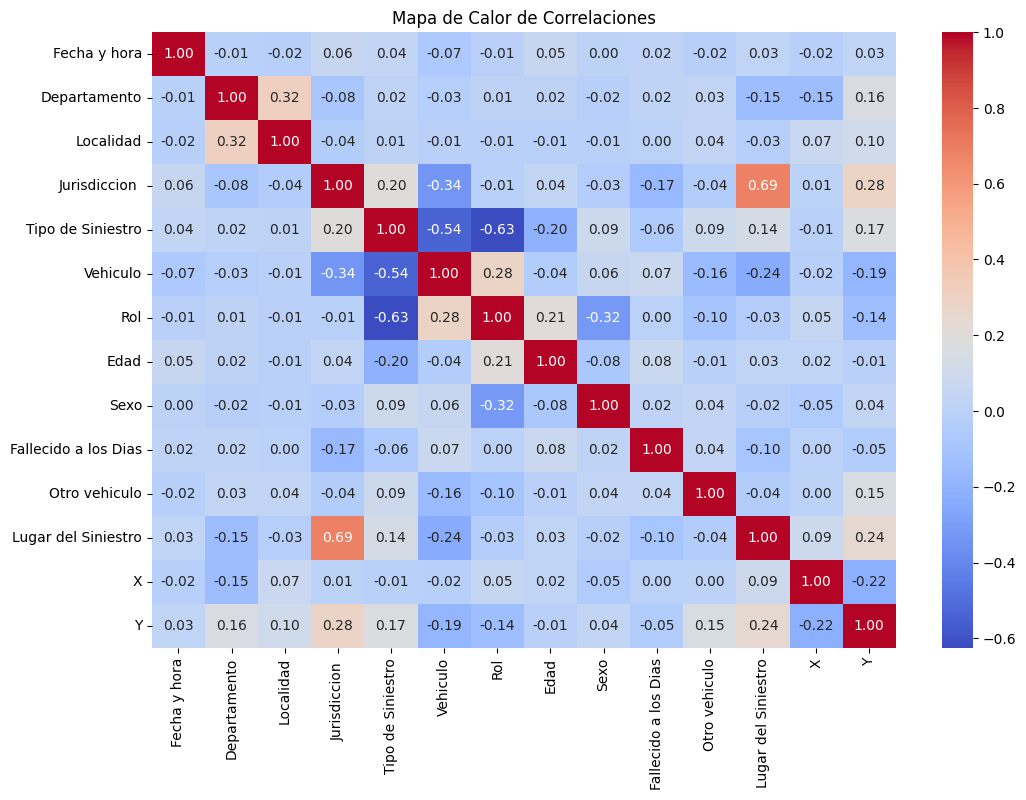

In [36]:
# Pasamos todas las variables a numéricas para poder ver la relación entre ellas

#1. Convertir fechas a numérico (ejemplo: número de segundos desde el inicio)
if 'Fecha y hora' in df.columns:
    df['Fecha y hora'] = pd.to_datetime(df['Fecha y hora'], errors='coerce')
    df['Fecha y hora'] = df['Fecha y hora'].apply(lambda x: x.timestamp() if not pd.isnull(x) else np.nan)

# 2. Rellenar valores faltantes en columnas numéricas con la media
df = df.fillna(df.mean(numeric_only=True))

# 3. Convertir columnas categóricas a numéricas (Label Encoding)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes

# 4. Verificar columnas de coordenadas
if 'X' in df.columns and 'Y' in df.columns:
    df['X'] = pd.to_numeric(df['X'], errors='coerce')
    df['Y'] = pd.to_numeric(df['Y'], errors='coerce')

# 5. Eliminar filas restantes con valores nulos
df = df.dropna()

# Verificar las primeras filas después de convertir
print(df.head())

# Calcular correlación para todas las variables
correlation_matrix = df.corr()

# Visualizar el resultado (opcional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [67]:
# Vemos que no hay una relación clara entre variables